<a href="https://colab.research.google.com/github/Swathi-Thandavarayan/STORE-DATA-PREDICTION/blob/main/STORE_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict the department-wide sales for each store for the following year.

Model the effects of markdowns on holiday weeks.

Provide recommended actions based on the insights drawn, with prioritisation placed on largest business impact


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#DATA IMPORT

In [2]:
path1 = '/content/Features_data_set.csv'
path2 = '/content/sales_data_set.csv'
path3 = '/content/stores_data_set.csv'
data_feature = pd.read_csv(path1)
data_sales = pd.read_csv(path2)
data_stores = pd.read_csv(path3)

In [3]:
data_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
data_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#DATA MERGING

In [9]:
merged_df = pd.merge(data_feature, data_sales, on=['Store','Date','IsHoliday'])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [10]:
stores_data = pd.merge(merged_df, data_stores, on='Store')
stores_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [11]:
stores_data.shape

(421570, 16)

In [12]:
stores_data.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
dtype: int64

# DATA CLEANING

##stores_data

shape
dtype
null
describe
duplicates

In [13]:
stores_data.shape

(421570, 16)

In [14]:
stores_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
dtype: object

In [15]:
stores_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

###store

In [16]:
stores_data.Store.dtype

dtype('int64')

In [17]:
stores_data.Store.isnull().sum()

0

In [18]:
stores_data.Store.describe()

count    421570.000000
mean         22.200546
std          12.785297
min           1.000000
25%          11.000000
50%          22.000000
75%          33.000000
max          45.000000
Name: Store, dtype: float64

In [115]:
stores_data.Store.nunique()

45

In [20]:
stores_data.Store.value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

IQR

In [21]:
q3 = stores_data.Store.quantile(.75)
q1 = stores_data.Store.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(66.0, -22.0)

###Date

In [22]:
stores_data.Date.value_counts()

Date
23/12/2011    3027
25/11/2011    3021
16/12/2011    3013
09/12/2011    3010
17/02/2012    3007
              ... 
09/07/2010    2903
16/07/2010    2901
20/08/2010    2901
27/08/2010    2898
13/08/2010    2896
Name: count, Length: 143, dtype: int64

In [23]:
##
#stores_data.Date.loc[(stores_data.Date == 05/02/2010), :]

In [24]:
stores_data.Date.isnull().sum()

0

In [25]:
stores_data.Date.describe()

count         421570
unique           143
top       23/12/2011
freq            3027
Name: Date, dtype: object

###Temperature

In [26]:
stores_data.Temperature.isnull().sum()

0

In [27]:
stores_data.Temperature.describe()

count    421570.000000
mean         60.090059
std          18.447931
min          -2.060000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

In [28]:
q3 = stores_data.Temperature.quantile(.75)
q1 = stores_data.Temperature.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold, upper_threshold

(5.279999999999994, 115.68)

In [29]:
sum(stores_data.Temperature < lower_threshold )

69

In [30]:
stores_data.loc[(stores_data.Temperature < lower_threshold),:]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
62553,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,1,8976.04,B,70713
62554,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,2,21568.46,B,70713
62555,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,3,7555.18,B,70713
62556,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,4,15306.89,B,70713
62557,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,5,12835.06,B,70713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62617,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,94,-2.50,B,70713
62618,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,95,33881.30,B,70713
62619,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,96,1412.71,B,70713
62620,7,04/02/2011,-2.06,3.011,NaN,NaN,NaN,NaN,NaN,191.762589,8.818,False,97,4601.19,B,70713


In [31]:
# since there are values below the lower threshold (only 7 vlalues hence impute)
stores_data.Temperature = stores_data.Temperature.clip(lower_threshold, upper_threshold)

In [32]:
stores_data.Temperature.describe()

count    421570.000000
mean         60.091260
std          18.444122
min           5.280000
25%          46.680000
50%          62.090000
75%          74.280000
max         100.140000
Name: Temperature, dtype: float64

###Fuel_Price

In [33]:
stores_data.Fuel_Price.isnull().sum()

0

In [34]:
stores_data.Fuel_Price.describe()

count    421570.000000
mean          3.361027
std           0.458515
min           2.472000
25%           2.933000
50%           3.452000
75%           3.738000
max           4.468000
Name: Fuel_Price, dtype: float64

In [35]:
q3 = stores_data.Fuel_Price.quantile(.75)
q1 = stores_data.Fuel_Price.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(1.7254999999999996, 4.9455)

In [36]:
##from google.colab import drive
#drive.mount('/content/drive')

hence no outliers

###MarkDown1

In [37]:
stores_data.MarkDown1.isnull().sum()

270889

In [38]:
stores_data.MarkDown1.dtype

dtype('float64')

In [39]:
stores_data.MarkDown1.value_counts()

MarkDown1
1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: count, Length: 2277, dtype: int64

In [40]:
stores_data.MarkDown1.fillna(0, inplace = True)
stores_data.MarkDown2.fillna(0, inplace = True)
stores_data.MarkDown3.fillna(0, inplace = True)
stores_data.MarkDown4.fillna(0, inplace = True)
stores_data.MarkDown5.fillna(0, inplace = True)

###CPI

In [41]:
stores_data.CPI.dtype

dtype('float64')

In [42]:
stores_data.CPI.value_counts()

CPI
129.855533    711
131.108333    708
129.845967    707
130.384903    706
130.645793    706
             ... 
203.831516     45
213.173668     44
207.620696     44
207.495309     44
211.587991     44
Name: count, Length: 2145, dtype: int64

In [43]:
stores_data.CPI.describe()

count    421570.000000
mean        171.201947
std          39.159276
min         126.064000
25%         132.022667
50%         182.318780
75%         212.416993
max         227.232807
Name: CPI, dtype: float64

In [44]:
q3 = stores_data.CPI.quantile(.75)
q1 = stores_data.CPI.quantile(.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

lower_threshold,upper_threshold #hence no outliers

(11.431177550000001, 333.00848195000003)

In [45]:
stores_data.CPI.loc[stores_data.CPI < lower_threshold].value_counts().sum()

0

###Unemployment

In [46]:
stores_data.Unemployment.dtype

dtype('float64')

###IsHoliday

In [112]:
stores_data.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [47]:
stores_data.IsHoliday.dtype

dtype('bool')

In [48]:
stores_data.IsHoliday = stores_data.IsHoliday.astype('bool')

In [49]:
stores_data.IsHoliday.dtype

dtype('bool')

###Dept                

In [50]:
stores_data.Dept.dtype

dtype('int64')

In [51]:
stores_data.Dept.nunique()

81

###Weekly_Sales

In [52]:
stores_data.Weekly_Sales.dtype

dtype('float64')

###Type

In [157]:
stores_data.Type.dtype

dtype('O')

In [159]:
stores_data['Type'] = stores_data['Type'].astype(str)

In [160]:
stores_data.Type.dtype

dtype('O')

In [154]:
stores_data.Type.unique()

array(['A', 'B', 'C'], dtype=object)

###Size

#DATA VISUALISATION

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Dependent - Weekly_Sales
# Supervised Regression

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday", "Dept"]

#string_columns = stores_data.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
#numeric_columns = stores_data.select_dtypes(include=['int64',"float64"]).columns

###catogorical columns

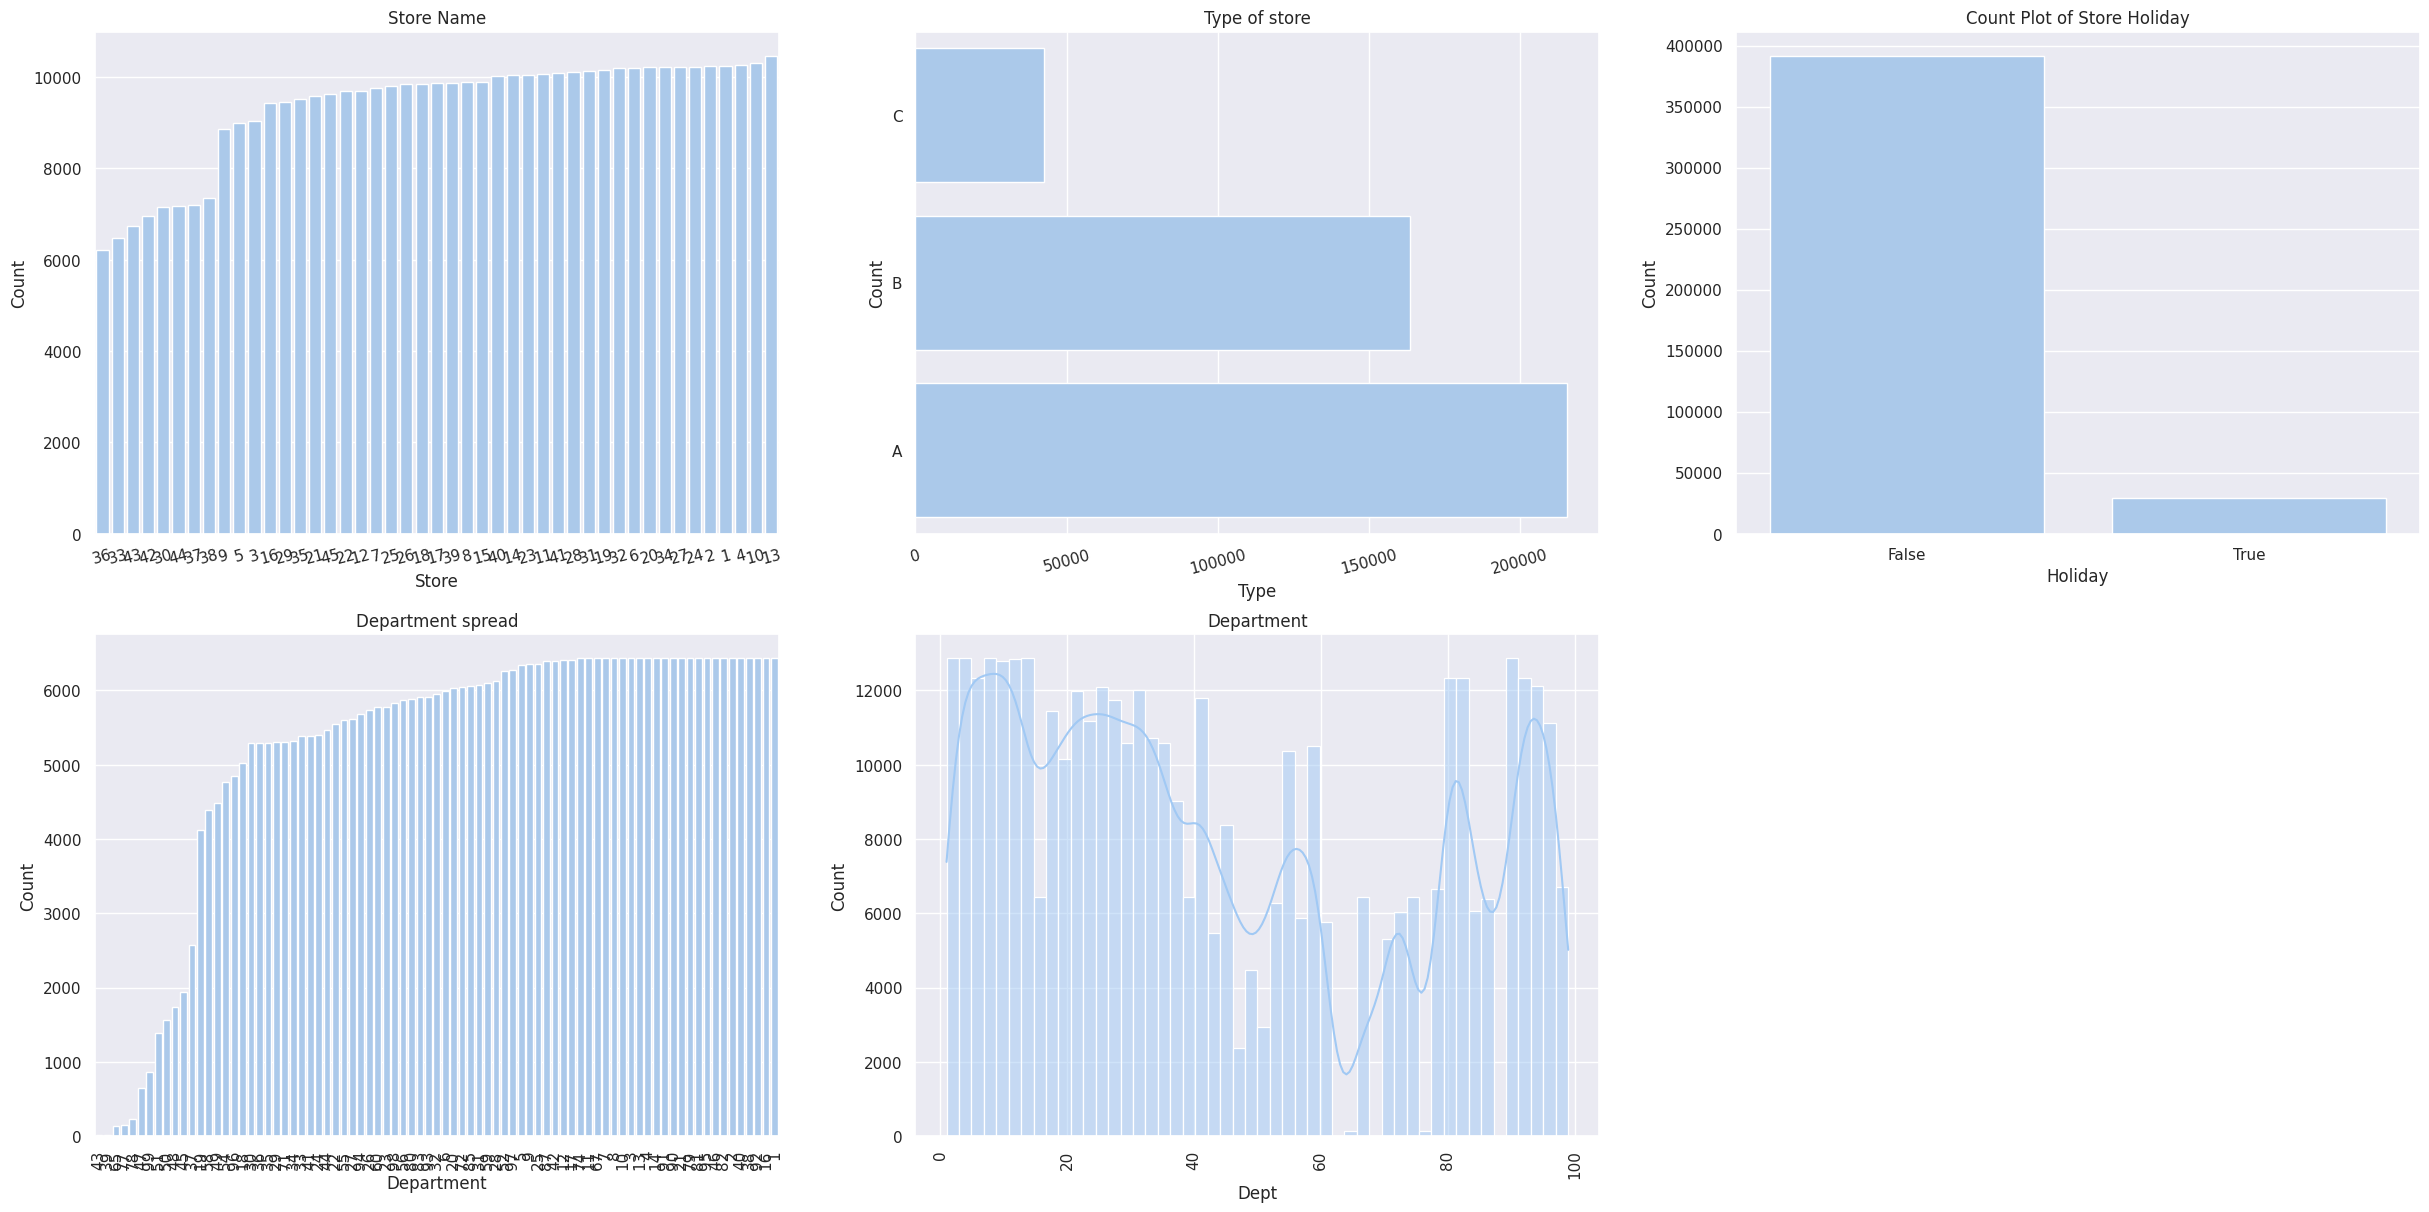

<Figure size 640x480 with 0 Axes>

In [162]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(30,30))

plt.subplot(431)
sns.countplot(x = 'Store', data = stores_data,order=stores_data['Store'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Store')
plt.ylabel('Count')
plt.title('Store Name')


plt.subplot(432)
sns.countplot(stores_data['Type'],order=stores_data['Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type of store')

plt.subplot(433)
sns.countplot(x='IsHoliday', data=stores_data)
plt.title('Count Plot of Store Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.subplot(434)
sns.countplot(x='Dept', data=stores_data,order=stores_data['Dept'].value_counts().index[::-1])
plt.title('Department spread')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)


plt.subplot(435)
sns.histplot(data=stores_data, x=stores_data.Dept, kde=True, bins=50)
plt.xticks(rotation=90)
plt.xlabel('Dept')
plt.ylabel('Count')
plt.title('Department')

plt.show()
plt.tight_layout()

##interpretations
1. type A store are higher

###continous columns

KeyError: 'int_sqft'

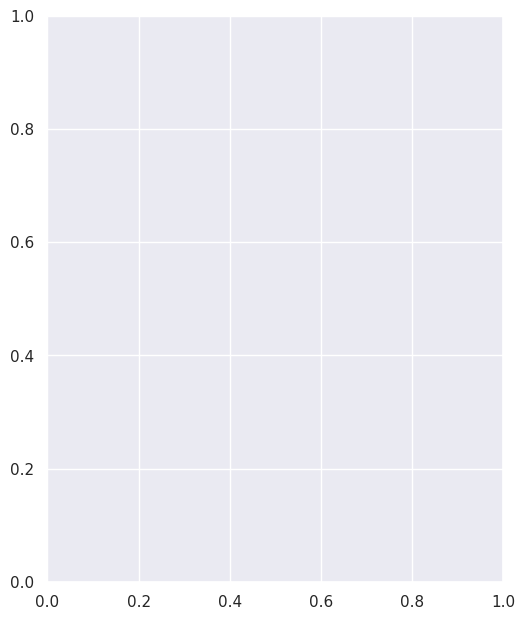

In [138]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.scatterplot(stores_data['int_sqft'],stores_data['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
sns.scatterplot(stores_data['dist_mainroad'],stores_data['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
sns.lineplot(stores_data['n_bedroom'],stores_data['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
sns.lineplot(stores_data['n_bathroom'],stores_data['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(stores_data['n_room'],stores_data['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
sns.lineplot(stores_data['house_age'],stores_data['sales_price'])
plt.title('House Age vs Sales_Price')